In [40]:
import numpy as np
from matplotlib.pyplot import plot
import pandas as pd
from pathlib import Path
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

local_drive = Path('C:/Users/torin/OneDrive')
databonds = Path('Desktop/Thesis/data/bonds/model')
datamacro = Path('Desktop/Thesis/data/macro')

In [41]:
it_debt = pd.read_csv(local_drive / datamacro / Path('model/bank_of_italy_statistics.csv'))
it_debt['Observation date'] = pd.to_datetime(it_debt['Observation date'])
deficit = it_debt[['Observation date','State budget: balance between revenue and expenditure (deficit: -)']]
deficit = deficit.set_index(['Observation date']).resample('MS').mean()

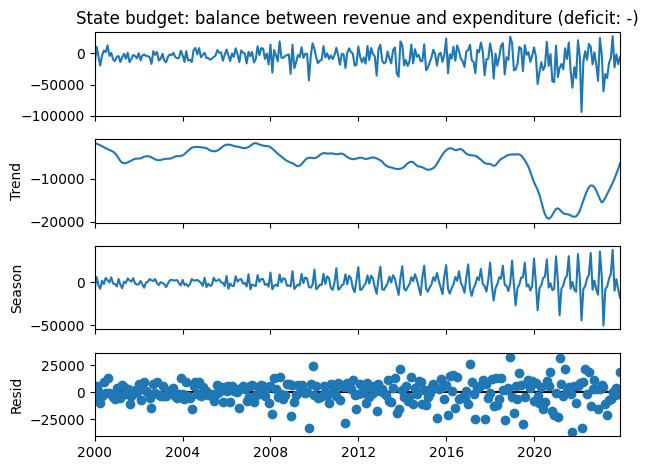

In [42]:
res = STL(deficit['State budget: balance between revenue and expenditure (deficit: -)'],
          period = 12,
          seasonal = 13).fit()

dftrend = pd.DataFrame(res.trend)
dftrend.columns=['trend - state deficit']
dftrend.to_csv(local_drive / datamacro / Path('model')  / Path('it_deficit_trend.csv'))

res.plot()
plt.show()

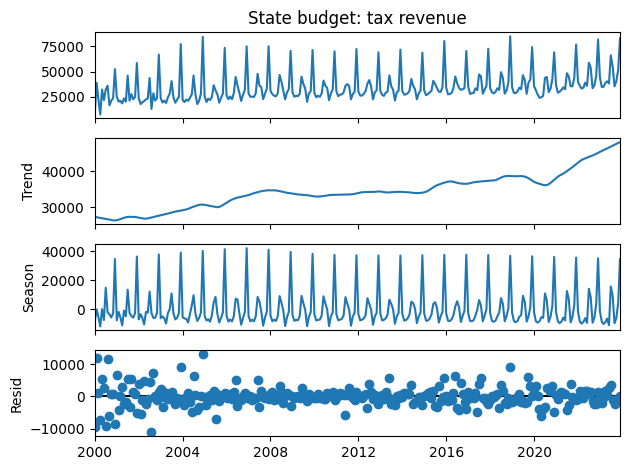

In [43]:
tax = it_debt[['Observation date','State budget: tax revenue']]
tax = tax.set_index(['Observation date']).resample('MS').mean()

res = STL(tax['State budget: tax revenue'],
          period = 12,
          seasonal = 13).fit()

dftrend = pd.DataFrame(res.trend)
dftrend.columns=['trend - state deficit']
dftrend.to_csv(local_drive / datamacro / Path('model')  / Path('it_taxrevenue_trend.csv'))

res.plot()
plt.show()
